# Data set used : Titanic Dataset

Import Data using Pandas and check out the Datastructure by using .head(3) 3 for the number of records

In [1]:
import pandas as pd
df = pd.read_csv('titanic_data.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


# Quality of Analysis

Query: How does Age, Class of Travel, Sex affect the survivability of passengers in Titanic mishap?

# Data Wrangling Phase

Data Wrangling Step, fill up blank value with 0 for easier analysis using .fillna(0) Method

In [2]:
df_na=df.fillna(0)

In [3]:
df_na.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S


Procedure to take the column value of Sex and based on the value make another column with output 0 or 1

In [4]:
def return_sex_to_Number(column):
    if column =='female':
        return 1
    else:
        return 0
    

Test the procedure

In [5]:
return_sex_to_Number('female')

1

Create new field (column) called Sexn, with numeric values, 1 for Women and 0 for men

In [6]:
df_na['Sexn']= df_na.applymap(return_sex_to_Number)['Sex']

In [7]:
df_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,0


# Exploration Phase

we use correlation procedure to find out the statistical correlation between different Attributes like Age Sex  and Fare

In [8]:
def correlation(x, y):
    x_int= (x-x.mean())/x.std(ddof=0) 
    y_int = (y-y.mean())/y.std(ddof=0)
    
    correlation =  x_int * y_int
    print correlation.mean()
    return correlation.mean()

    

Survived = df_na['Survived']
Sex = df_na['Sexn']
Age = df_na['Age']
Fare = df_na['Fare']



Populating the interactive namespace from numpy and matplotlib
0.543351380658


C:\Users\Abdul\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


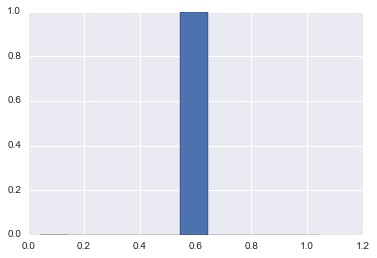

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
plt.hist(correlation( Sex,Survived))
#plt.scatter()



plt.show()



Procedure to Convert Age in bins of 10 each for Age o to 10 will fall in bin 1 and so on and so forth

In [10]:
def convert_age_in_bins(exam_grades):
    import pandas as pd
    value=0
    if exam_grades>=0 and exam_grades<=10:
        value = 1
    elif exam_grades>=11 and exam_grades<=20:
        value = 2
    elif exam_grades>=21 and exam_grades<=30:
        value = 3
    elif exam_grades>=31 and exam_grades<=40:
        value = 4
    elif exam_grades>=41 and exam_grades<=50:
        value = 5
    elif exam_grades>=51 and exam_grades<=60:
        value = 6
    elif exam_grades>=61 and exam_grades<=70:
        value = 7
    elif exam_grades>=71 and exam_grades<=80:
        value = 8
    elif exam_grades>=81 and exam_grades<=90:
        value = 9
    elif exam_grades>=91 :
        value = 10
        
    return value
#pd.qcut(exam_grades,
#                       [ 0.1, 0.2, 0.5, 0.8, 1],
#                       labels=['F', 'D', 'C', 'B', 'A'])
    
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        

Test Script to test procedure

In [11]:
convert_age_in_bins(99)

10

process to create a new field with value of Bin based on Age Value and check the data frame rendered

In [12]:
df_na['Agebin']=df_na.applymap(convert_age_in_bins)['Age']
df_na.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,1,3


# Exploration Phase 2

In [13]:
df_na.groupby(['Survived','Sex','Agebin']).count()['PassengerId']

Survived  Sex     Agebin
0         female  0           1
                  1          29
                  2          12
                  3          20
                  4           8
                  5          10
                  6           1
          male    0           5
                  1         122
                  2          59
                  3         125
                  4          76
                  5          41
                  6          24
                  7          13
                  8           3
1         female  1          55
                  2          34
                  3          61
                  4          46
                  5          21
                  6          13
                  7           3
          male    1          35
                  2          10
                  3          23
                  4          23
                  5          12
                  6           4
                  7           1
               

In [14]:
df_na.groupby(['Survived','Embarked']).count()['PassengerId']

Survived  Embarked
0         C            75
          Q            47
          S           427
1         0             2
          C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64

Building dataframe for visual analysis 

In [15]:
df_na_survived = df_na [(df_na.Survived == 1)]

In [16]:
df_na_not_survived = df_na [(df_na.Survived == 0)]

In [17]:
df_na_survived_female =df_na_survived [(df_na_survived.Sexn==1)]

In [18]:
df_na_survived_male =df_na_survived [(df_na_survived.Sexn==0)]

In [19]:
df_na_not_survived_female =df_na_not_survived [(df_na_not_survived.Sexn==1)]

In [20]:
df_na_not_survived_male =df_na_not_survived [(df_na_not_survived.Sexn==0)]

In [21]:
df_na_survived_male.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn,Agebin
17,18,1,2,"Williams, Mr. Charles Eugene",male,0,0,0,244373,13.0,0,S,0,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0,D56,S,0,4
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5,A6,S,0,3


In [22]:
df_na_survived_female.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn,Agebin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,4


In [23]:
df_na_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].index.get_level_values('Agebin').tolist()

[1, 2, 3, 4, 5, 6, 7]

In [24]:
df_na_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].values

array([55, 34, 61, 46, 21, 13,  3], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


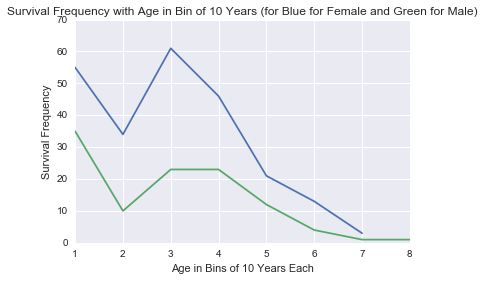

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
plt.plot(df_na_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].index.get_level_values('Agebin').tolist(), df_na_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].values) 
plt.plot(df_na_survived_male.groupby(['Survived','Agebin']).count()['PassengerId'].index.get_level_values('Agebin').tolist(), df_na_survived_male.groupby(['Survived','Agebin']).count()['PassengerId'].values) 

plt.xlabel("Age in Bins of 10 Years Each") 
plt.ylabel("Survival Frequency")
plt.title("Survival Frequency with Age in Bin of 10 Years (for Blue for Female and Green for Male)")


plt.show()

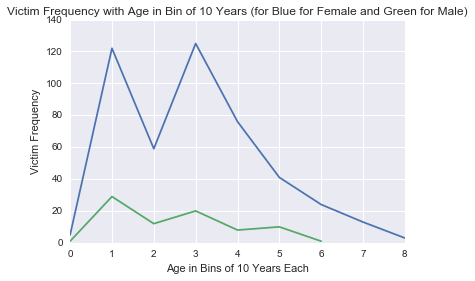

In [30]:
plt.plot(df_na_not_survived_male.groupby(['Survived','Agebin']).count()['PassengerId'].index.get_level_values('Agebin').tolist(), df_na_not_survived_male.groupby(['Survived','Agebin']).count()['PassengerId'].values) 
plt.plot(df_na_not_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].index.get_level_values('Agebin').tolist(), df_na_not_survived_female.groupby(['Survived','Agebin']).count()['PassengerId'].values) 

plt.xlabel("Age in Bins of 10 Years Each") 
plt.ylabel("Victim Frequency")
plt.title("Victim Frequency with Age in Bin of 10 Years (for Blue for Male and Green for Female)")

In [31]:
len((df_na.groupby(['Survived','Sex','Agebin']).count()['PassengerId']).index.get_level_values('Agebin'))

31

In [32]:
len((df_na.groupby(['Survived','Sex','Agebin']).count()['PassengerId']).values)

31

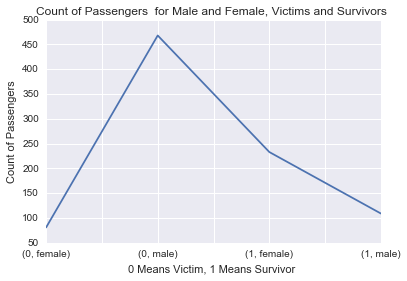

In [41]:
df_na.groupby(['Survived','Sex'] ).count()['PassengerId'].plot()

plt.xlabel("0 Means Victim, 1 Means Survivor ") 
plt.ylabel("Count of Passengers")
plt.title("Count of Passengers  for Male and Female, Victims and Survivors ")
plt.show()

Finding out the Average Survival Ratio


In [43]:
Survival_ratio = round((float((df_na [(df_na.Survived==1)]).count()['Survived'])/ float(df_na.count()['Survived'])),3)
Survival_ratio

0.384

In [44]:
field_column='Sexn'

Function which returns Survival Ration Based on supplying parameters of Data Frame, Field and distinct Value

we will compare how the Average Survival Ratio are Statistically Related, Significant or Insignificant to each Field and Values.

In [45]:
def survial_ratio_parameters(df, field, value):
    survival_ratio =0
    dividend = float((df[(df[field]==value) & (df.Survived==1)]).count()['Survived'])
    divisor  = float(df[(df[field]==value)].count()['Survived'])
    survival_ratio = round((dividend/divisor),3)
    return  survival_ratio  

Survival Ratio of Field called Embarked with value of C

In [116]:
survial_ratio_parameters(df_na,'Embarked','C')

0.554

Find out unique values in Embarked Column

In [117]:
list(set(df_na.Embarked))

['Q', 0, 'S', 'C']

Procedure to return Character Zero for 0 number for easier comparision and removing a bug

In [118]:
def classify_zero_to_charachter(char):
    if char ==0:
        return '0'
    else :
        return char

In [119]:
classify_zero_to_charachter(0)

'0'

This Command Ensure we are not Adding the Field Embarkedc Again

In [120]:
df_na.drop('Embarkedc', axis=1, inplace=True)  

Command to add Embarkedc Column with feature to convert 0 to '0'

In [125]:
df_na['Embarkedc'] = df['Embarked'].map(classify_zero_to_charachter)

In [126]:
list(set(df_na.Embarkedc))

['Q', nan, 'S', 'C']

.fillna procedure fills up the blank value with '0'

In [128]:
df_na.Embarkedc.fillna('0', inplace=True)

list out unique values of Field Embarkedc

In [130]:
list(set(df_na.Embarkedc))

['Q', '0', 'S', 'C']

Survival Ratio of Women 

In [131]:
survial_ratio_parameters(df_na,field_column,1)

0.742

Survival Ratio of Men 

In [132]:
survial_ratio_parameters(df_na,field_column,0)

0.189

Survival Ratio of Pclass 1

In [133]:
field_column='Pclass'

In [134]:
survial_ratio_parameters(df_na,field_column,1)

0.63

Survival Ratio of Pclass 2

In [135]:
survial_ratio_parameters(df_na,field_column,2)

0.473

Survival Ratio of Pclass 3

In [136]:
survial_ratio_parameters(df_na,field_column,3)

0.242

Survival Ratio of Age Bin 1 Range 0 to 10 Years

In [137]:
field_column='Agebin'

In [138]:
survial_ratio_parameters(df_na,field_column,1)

0.373

Survival Ratio of Age Bin 2 Range 11 to 20 Years

In [139]:
survial_ratio_parameters(df_na,field_column,2)

0.383

Survival Ratio of Age Bin 3 Range 21 to 30 Years

In [140]:
survial_ratio_parameters(df_na,field_column,3)

0.367

Survival Ratio of Age Bin 4 Range 31 to 40 Years

In [141]:
survial_ratio_parameters(df_na,field_column,4)

0.451

Survival Ratio of Age Bin 5 Range 41 to 50 Years

In [142]:
survial_ratio_parameters(df_na,field_column,5)

0.393

Survival Ratio of Age Bin 6 Range 51 to 60 Years

In [143]:
survial_ratio_parameters(df_na,field_column,6)

0.405

Survival Ratio of Age Bin 7 Range 61 to 70 Years

In [144]:
survial_ratio_parameters(df_na,field_column,7)

0.235

In [145]:
survial_ratio_parameters(df_na,field_column,7)

0.235

Survival Ratio of Age Bin 8 Range 71 to 80 Years

In [146]:
survial_ratio_parameters(df_na,field_column,8)

0.25

Survival Ratio of Siblings 0

In [147]:
field_column='SibSp'

In [148]:
survial_ratio_parameters(df_na,field_column,0)

0.345

Survival Ratio of Siblings 1

In [149]:
survial_ratio_parameters(df_na,field_column,1)

0.536

Survival Ratio of Siblings 2

In [150]:
survial_ratio_parameters(df_na,field_column,2)

0.464

Survival Ratio of Siblings 3

In [151]:
survial_ratio_parameters(df_na,field_column,3)

0.25

Survival Ratio of Siblings 4

In [152]:
survial_ratio_parameters(df_na,field_column,4)

0.167

Survival Ratio of Siblings 5

In [153]:
survial_ratio_parameters(df_na,field_column,5)

0.0

Survival Ratio of Siblings 6

In [154]:
survial_ratio_parameters(df_na,field_column,6)

ZeroDivisionError: float division by zero

Survival Ratio of Siblings 7

In [156]:
survial_ratio_parameters(df_na,field_column,7)

ZeroDivisionError: float division by zero

Survival Ratio of Siblings 8

In [157]:
survial_ratio_parameters(df_na,field_column,8)

0.0

Survival Ratio based on Embarked Station Q

In [158]:
field_column='Embarkedc'

In [159]:
survial_ratio_parameters(df_na,field_column,'Q')

0.39

Survival Ratio based on Embarked Station S

In [160]:
survial_ratio_parameters(df_na,field_column,'S')

0.337

Survival Ratio based on Embarked Station C

In [161]:
survial_ratio_parameters(df_na,field_column,'C')

0.554

This program will create a list and mark the fields and value with p value less than P critical value of .025, so that we can get a list of attribute which had survival ratio statistically significant than the population.

In [162]:

def welch_T_test_result_param(key_field, df, field, value):
    import scipy.stats
    
    result = scipy.stats.ttest_ind(  df[key_field],df[key_field][df[field]==value] , equal_var=False)
    print result
    if result[1]<=.025:
        return(field, value,False,result[0],result[1])
    else:
        return(field, value,True,result[0],result[1])


Creating a list final_result for appending all the columns and values, so that we can get a final list of Attributes and values which are statistically significant

In [163]:
final_result=[]
# getting result for Embarked Station 'C'
final_result.append(welch_T_test_result_param ('Survived',df_na, 'Embarkedc', 'C'))
final_result

Ttest_indResult(statistic=-4.0625543758321898, pvalue=6.6530195679848764e-05)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05)]

In [164]:
# getting result for Embarked Station 'Q'
final_result.append(welch_T_test_result_param ('Survived',df_na, 'Embarkedc', 'Q'))
final_result

Ttest_indResult(statistic=-0.099063831501008656, pvalue=0.92130937841149518)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05),
 ('Embarkedc', 'Q', True, -0.099063831501008656, 0.92130937841149518)]

In [165]:
# getting result for Embarked Station 'S'
final_result.append(welch_T_test_result_param ('Survived',df_na, 'Embarkedc', 'S'))
final_result

Ttest_indResult(statistic=1.8932353268808138, pvalue=0.058531501793359447)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05),
 ('Embarkedc', 'Q', True, -0.099063831501008656, 0.92130937841149518),
 ('Embarkedc', 'S', True, 1.8932353268808138, 0.058531501793359447)]

In [166]:
# getting result for Siblings column Sibsp with bins 1 to 8
field_column='SibSp'
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 1))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 2))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 3))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 4))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 5))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 8))
final_result

Ttest_indResult(statistic=-3.9772449855282268, pvalue=8.700367881803975e-05)
Ttest_indResult(statistic=-0.8263401996659383, pvalue=0.4154568192834851)
Ttest_indResult(statistic=1.1845618094180559, pvalue=0.25387523888306529)
Ttest_indResult(statistic=2.3645223108189852, pvalue=0.029410202532815375)
Ttest_indResult(statistic=23.546257229296476, pvalue=1.1178557329333008e-95)
Ttest_indResult(statistic=23.546257229296476, pvalue=1.1178557329333008e-95)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05),
 ('Embarkedc', 'Q', True, -0.099063831501008656, 0.92130937841149518),
 ('Embarkedc', 'S', True, 1.8932353268808138, 0.058531501793359447),
 ('SibSp', 1, False, -3.9772449855282268, 8.700367881803975e-05),
 ('SibSp', 2, True, -0.8263401996659383, 0.4154568192834851),
 ('SibSp', 3, True, 1.1845618094180559, 0.25387523888306529),
 ('SibSp', 4, True, 2.3645223108189852, 0.029410202532815375),
 ('SibSp', 5, False, 23.546257229296476, 1.1178557329333008e-95),
 ('SibSp', 8, False, 23.546257229296476, 1.1178557329333008e-95)]

In [167]:
# getting result for Siblings column Sibsp with bins 1 to 8
field_column='Pclass'
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 1))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 2))
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 3))
final_result

Ttest_indResult(statistic=-6.6886715942911472, pvalue=9.7059168447268962e-11)
Ttest_indResult(statistic=-2.2055984151689554, pvalue=0.0282895753113327)
Ttest_indResult(statistic=5.5902358336754361, pvalue=2.8466259498782026e-08)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05),
 ('Embarkedc', 'Q', True, -0.099063831501008656, 0.92130937841149518),
 ('Embarkedc', 'S', True, 1.8932353268808138, 0.058531501793359447),
 ('SibSp', 1, False, -3.9772449855282268, 8.700367881803975e-05),
 ('SibSp', 2, True, -0.8263401996659383, 0.4154568192834851),
 ('SibSp', 3, True, 1.1845618094180559, 0.25387523888306529),
 ('SibSp', 4, True, 2.3645223108189852, 0.029410202532815375),
 ('SibSp', 5, False, 23.546257229296476, 1.1178557329333008e-95),
 ('SibSp', 8, False, 23.546257229296476, 1.1178557329333008e-95),
 ('Pclass', 1, False, -6.6886715942911472, 9.7059168447268962e-11),
 ('Pclass', 2, True, -2.2055984151689554, 0.0282895753113327),
 ('Pclass', 3, False, 5.5902358336754361, 2.8466259498782026e-08)]

In [168]:
# getting result for Sex 1 for Female, 0 for Male
field_column='Sexn'
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 1)) # Female
final_result.append(welch_T_test_result_param ('Survived',df_na, field_column, 0)) # Male
final_result

Ttest_indResult(statistic=-12.093514213449467, pvalue=2.6531687352169131e-30)
Ttest_indResult(statistic=8.4533016744187091, pvalue=7.0186408619159955e-17)


[('Embarkedc', 'C', False, -4.0625543758321898, 6.6530195679848764e-05),
 ('Embarkedc', 'Q', True, -0.099063831501008656, 0.92130937841149518),
 ('Embarkedc', 'S', True, 1.8932353268808138, 0.058531501793359447),
 ('SibSp', 1, False, -3.9772449855282268, 8.700367881803975e-05),
 ('SibSp', 2, True, -0.8263401996659383, 0.4154568192834851),
 ('SibSp', 3, True, 1.1845618094180559, 0.25387523888306529),
 ('SibSp', 4, True, 2.3645223108189852, 0.029410202532815375),
 ('SibSp', 5, False, 23.546257229296476, 1.1178557329333008e-95),
 ('SibSp', 8, False, 23.546257229296476, 1.1178557329333008e-95),
 ('Pclass', 1, False, -6.6886715942911472, 9.7059168447268962e-11),
 ('Pclass', 2, True, -2.2055984151689554, 0.0282895753113327),
 ('Pclass', 3, False, 5.5902358336754361, 2.8466259498782026e-08),
 ('Sexn', 1, False, -12.093514213449467, 2.6531687352169131e-30),
 ('Sexn', 0, False, 8.4533016744187091, 7.0186408619159955e-17)]

In [169]:
# Printing Attributes and Values whose probability is 
for i in final_result:
    if i[4]<=.025:
        print 'The Attribute ', i[0], ' is Statistically Significant  with column value ', i[1], '  at P value of ',round(i[4],3)

The Attribute  Embarkedc  is Statistically Significant  with column value  C   at P value of  0.0
The Attribute  SibSp  is Statistically Significant  with column value  1   at P value of  0.0
The Attribute  SibSp  is Statistically Significant  with column value  5   at P value of  0.0
The Attribute  SibSp  is Statistically Significant  with column value  8   at P value of  0.0
The Attribute  Pclass  is Statistically Significant  with column value  1   at P value of  0.0
The Attribute  Pclass  is Statistically Significant  with column value  3   at P value of  0.0
The Attribute  Sexn  is Statistically Significant  with column value  1   at P value of  0.0
The Attribute  Sexn  is Statistically Significant  with column value  0   at P value of  0.0


# Conclusion

 As per our Analysis, the population mean survival ratio is 0.384, and  the passengers who embarked on the Station C had a less Survival ratio Mean of 0.554 , to confirm the significance level, we did a Welch T test and confirmed that this attribute is statistically significant.
 
 with P critical value of 0.025

Similary our Analysis has concluded that Following Attributes Survival ration were Statistically Signficant 

Passengers with 1 Sibiling
Passengers with 5 Sibiling
Passengers with 8 Sibiling


 with P critical value of 0.025

Similary our Analysis has concluded that Following Attributes Survival ratios were Statistically Signficant 

Passengers with Class 1 
Passengers with Class 3 

our Analysis has concluded that Following Attributes Survival ration were Statistically Signficant
